### 리스트
- 데이터에 순서를 매겨 늘어놓은 자료구조
    - 스택, 큐 등
- 연결 리스트
    - 노드
        - 연결 리스트의 각 원소
        - 데이터와 뒤 노드를 가리키는 포인터로 구성
        - 머리/꼬리/앞쪽/뒤쪽 노드
    - 데이터를 삽입·삭제함에 따라 데이터를 옮겨야 해서 효율적이지 않음

### 8-2
## 포인터로 연결리스트
- Node 클래스
    - data : 데이터에 대한 참조 ( 임의의 자료형 )
    - next : 노드에 대한 참조 (꼬리 노드의 next는 None, 나머지는 Node형)
    - 자기 참조형 구조 : 자신과 같은 형의 인스턴스를 참조하는 필드가 있는 구조

    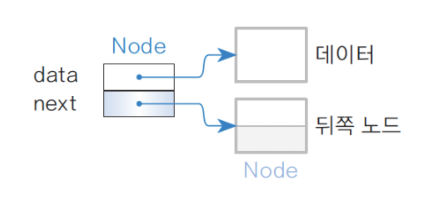

### 연결리스트 클래스
- no: 리스트에 등록된 노드의 개수
- head: 머리 노드에 대한 참조
- current: 현재 주목하는 노드에 대한 참조
- 꼬리 노드 판단 : next 필드가 None이면 꼬리 노드

In [2]:
%%writefile linked_list.py
from __future__ import annotations
from typing import Any, Type

class Node:
    def __init__(self, data:Any = None, next:Node = None):
        self.data = data
        self.next = next

class LinkedList:
    def __init__(self) -> None:
        self.no = 0
        self.head = None
        self.current = None

    def __len__(self) -> int:
        return self.no

    def search(self, data:Any) -> int:
        cnt = 0
        ptr = self.head
        while ptr is not None:
            if ptr.data == data:
                self.current = ptr
                return cnt
            cnt += 1
            ptr = ptr.next
        return -1

    def __contains__(self, data:Any) -> bool:
        return self.search(data) >= 0

    def add_first(self, data:Any) -> None:
        ptr = self.head
        self.head = self.current = Node(data, ptr)
        self.no += 1

    def add_last(self, data:Any) -> None:
        if self.head is None:
            self.add_first(data)
        else :
            ptr = self.head
            while ptr.next is not None:
                ptr = ptr.next
            ptr.next = self.current = Node(data, None)
            self.no += 1

    def remove_first(self) -> None:
        if self.head is not None:
            self.head = self.current = self.head.next
        self.no -= 1

    def remove_last(self) -> None:
        if self.head is not None:
            if self.head.next is None:
                self.remove_first
            else:
                ptr = self.head
                pre = self.head

                while ptr.next is not None:
                    pre = ptr
                    ptr = ptr.next
                pre.next = None
                self.current = pre
                self.no -= 1

    def remove(self, p:Node) -> None:
        if self.head is not None:
            if p is self.head:
                self.remove_first()
            else:
                ptr = self.head

                while ptr.next is not p:
                    ptr = ptr.next
                    if ptr is None:
                        return
                ptr.next = p.next
                self.current = ptr
                self.no -= 1

    def remove_current_node(self) -> None:
        self.remove(self.current)

    def clear(self) -> None:
        while self.head is not None:
            self.remove_first()
        self.current = None
        self.no = 0

    def next(self) -> bool:
        if self.current is None or self.current.next is None:
            return False
        self.current = self.current.next
        return True

    def print_current_node(self) -> None:
        if self.current is None:
            print('주목 노드가 존재하지 않습니다.')
        else:
            print(self.current.data)

    def print(self) -> None:
        ptr = self.head
        while ptr is not None:
            print(ptr.data)
            ptr = ptr.next

    def __iter__(self) -> LinkedListIterator:
        return LinkedListIterator(self.head)

class LinkedListIterator:
    def __init__(self, head:Node):
        self.current = head

    def __iter__(self) -> LinkedListIterator:
        return self

    def __next__(self) -> Any:
        if self.current is None:
            raise StopIteration
        else:
            data = self.current.data
            self.current = self.current.next
            return data

Writing linked_list.py


### 포인터로 만든 연결리스트 클래스 프로그램

In [4]:
from enum import Enum
from linked_list import LinkedList

Menu = Enum('Menu', ['머리에노드삽입', '꼬리에노드삽입', '머리노드삭제',
                     '꼬리노드삭제', '주목노드출력', '주목노드이동',
                     '주목노드삭제', '모든노드삭제', '검색', '멤버십판단',
                     '모든노드출력', '스캔', '종료'])

def select_Menu() -> Menu:
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep=' ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)

lst = LinkedList()

while True:
    menu = select_Menu()

    if menu==Menu.머리에노드삽입:
        lst.add_first(int(input('머리 노드에 넣을 값을 입력하세요.: ')))
    elif menu==Menu.꼬리에노드삽입:
        lst.add_last(int(input('꼬리 노드에 넣을 값을 입력하세요.: ')))
    elif menu==Menu.머리노드삭제:
        lst.remove_first()
    elif menu==Menu.꼬리노드삭제:
        lst.remove_last()
    elif menu==Menu.주목노드출력:
        lst.print_current_node()
    elif menu==Menu.주목노드이동:
        lst.next()
    elif menu==Menu.주목노드삭제:
        lst.remove_current_node()
    elif menu==Menu.모든노드삭제:
        lst.clear()
    elif menu==Menu.검색:
        pos = lst.search(int(input('검색할 값을 입력하세요.: ')))
        if pos >= 0:
            print(f'그 값의 데이터는 {pos+1}번째에 있습니다.')
        else:
            print('해당하는 데이터가 없습니다. ')
    elif menu==Menu.멤버십판단:
        print('그 값의 데이터는 포함되어'
        + (' 있습니다.' if int(input('판단할 값을 입력하세요.: ')) in lst else
        '있지 않습니다.'))
    elif menu==Menu.모든노드출력:
        lst.print()
    elif menu==Menu.스캔:
        for e in lst:
            print(e)
    else:
        break

(1)머리에노드삽입 (2)꼬리에노드삽입 (3)머리노드삭제 (4)꼬리노드삭제 (5)주목노드출력 (6)주목노드이동 (7)주목노드삭제 (8)모든노드삭제 (9)검색 (10)멤버십판단 (11)모든노드출력 (12)스캔 (13)종료: 1
머리 노드에 넣을 값을 입력하세요.: 1
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)머리노드삭제 (4)꼬리노드삭제 (5)주목노드출력 (6)주목노드이동 (7)주목노드삭제 (8)모든노드삭제 (9)검색 (10)멤버십판단 (11)모든노드출력 (12)스캔 (13)종료: 2
꼬리 노드에 넣을 값을 입력하세요.: 5
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)머리노드삭제 (4)꼬리노드삭제 (5)주목노드출력 (6)주목노드이동 (7)주목노드삭제 (8)모든노드삭제 (9)검색 (10)멤버십판단 (11)모든노드출력 (12)스캔 (13)종료: 1
머리 노드에 넣을 값을 입력하세요.: 10
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)머리노드삭제 (4)꼬리노드삭제 (5)주목노드출력 (6)주목노드이동 (7)주목노드삭제 (8)모든노드삭제 (9)검색 (10)멤버십판단 (11)모든노드출력 (12)스캔 (13)종료: 2
꼬리 노드에 넣을 값을 입력하세요.: 12
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)머리노드삭제 (4)꼬리노드삭제 (5)주목노드출력 (6)주목노드이동 (7)주목노드삭제 (8)모든노드삭제 (9)검색 (10)멤버십판단 (11)모든노드출력 (12)스캔 (13)종료: 1
머리 노드에 넣을 값을 입력하세요.: 14
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)머리노드삭제 (4)꼬리노드삭제 (5)주목노드출력 (6)주목노드이동 (7)주목노드삭제 (8)모든노드삭제 (9)검색 (10)멤버십판단 (11)모든노드출력 (12)스캔 (13)종료: 4
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)머리노드삭제 (4)꼬리노드삭제 (5)주목노드출력 (6)주목노드이동 (7)주목노드삭제 (8)모든노드삭제 (9)검색 (10)멤버십판단 (11)모든노드출력 (12)스캔 (13)종료: 9


### 8-4
## 원형 이중 연결 리스트

### 원형리스트 circular list
- 연결 리스트의 꼬리 노드가 다시 머리 노드를 가리키는 모양
- 꼬리 노드의 뒤쪽 포인터가 None이 아닌 머리 노드의 포인터 값

### 이중연결리스트 double-linked list, bidirectional linked list
- 뒤쪽 노드를 찾기 쉬운 반면 앞쪽 노드를 찾기 어렵다
- 각 노드는 뒤쪽 노드에 대한 포인터와 앞쪽 노드에 대한 포인터 존재

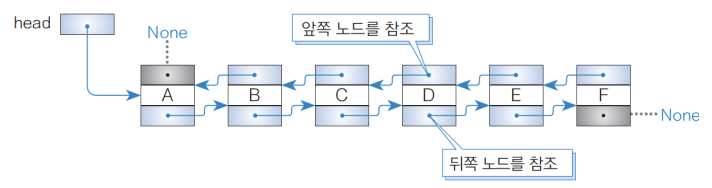

### 원형이중연결리스트 circular double linked list
- 원형 + 이중연결
- 개별 노드의 형은 이중 연결 리스트와 동일

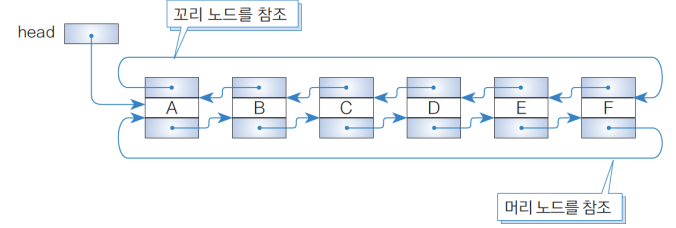

### Node class
- data : 데이터 (데이터에 대한 참조: 임의의 자료형)
- next : 뒤쪽 포인터 (뒤쪽 노드에 대한 참조: Node형)
- prev: 앞쪽 포인터 (앞쪽 노드에 대한 참조: Node형)

### 원형 이중 연결 리스트 클래스

In [12]:
%%writefile double_list3.py
from __future__ import annotations
from typing import Any, Type

class Node:

    def __init__(self, data: Any = None, prev: Node = None, next: Node = None) -> None:
        self.data = data
        self.prev = prev or self
        self.next = next or self

class DoubleLinkedList:

    def __init__(self) -> None:
        self.head = self.current = Node()
        self.no = 0

    def __len__(self) -> int:
        return self.no

    def is_empty(self) -> bool:
        return self.head.next is self.head

    def search(self, data: Any) -> Any:
        cnt = 0
        ptr = self.head.next
        while ptr is not self.head:
            if data == ptr.data:
                self.current = ptr
                return cnt
            cnt += 1
            ptr = ptr.next
        return -1

    def __contains__(self, data: Any) -> bool:
        return self.search(data) >= 0

    def print_current_node(self) -> None:
        if self.is_empty():
            print('주목 노드는 없습니다.')
        else:
            print(self.current.data)

    def print(self) -> None:
        ptr = self.head.next
        while ptr is not self.head:
            print(ptr.data)
            ptr = ptr.next

    def print_reverse(self) -> None:
        ptr = self.head.prev
        while ptr is not self.head:
            print(ptr.data)
            ptr = ptr.prev

    def next(self) -> bool:
        if self.is_empty() or self.current.next is self.head:
            return False
        self.current = self.current.next
        return True

    def prev(self) -> bool:
        if self.is_empty() or self.current.prev is self.head:
            return False
        self.current = self.current.prev
        return True

    def add(self, data: Any) -> None:
        node = Node(data, self.current, self.current.next)
        self.current.next.prev = node
        self.current.next = node
        self.current = node
        self.no += 1

    def add_first(self, data: Any) -> None:
        self.current = self.head
        self.add(data)

    def add_last(self, data: Any) -> None:
        self.current = self.head.prev
        self.add(data)

    def remove_current_node(self) -> None:
        if not self.is_empty():
            self.current.prev.next = self.current.next
            self.current.next.prev = self.current.prev
            self.current = self.current.prev
            self.no -= 1
            if self.current is self.head:
                self.current = self.head.next

    def remove(self, p:None) -> None:
        ptr = self.head.next

        while ptr is not self.head:
            if ptr is p:
                self.current = p
                self.remove_current_node()
                break
            ptr = ptr.next

    def remove_first(self) -> None:
        self.current = self.head.next
        self.remove_current_node()

    def remove_last(self) -> None:
        self.current = self.head.prev
        self.remove_current_node()

    def clear(self) -> None:
        while not self.is_empty():
            self.remove_current_node()
        self.no = 0

    def __iter__(self) -> DoubleLinkedListIterator:
        return DoubleLinkedListIterator(self.head)

    def __reversed__(self) -> DoubleLinkedListReverseIterator:
        return DoubleLinkedListReverseIterator(self.head)

class DoubleLinkedListIterator:

    def __init__(self, head: Node):
        self.head = head
        self.current = head.next

    def __iter__(self) -> DoubleLinkedListIterator:
        return self

    def __next__(self) -> Any:
        if self.current is self.head:
            raise StopIteration
        else:
            data = self.current.data
            self.current = self.current.next
            return data

class DoubleLinkedListReverseIterator:

    def __init__(self, head: Node):
        self.head = head
        self.current = head.prev

    def __iter__(self) -> DoubleLinkedListReverseIterator:
        return self

    def __next__(self) -> Any:
        if self.current is self.head:
            raise StopIteration
        else:
            data = self.current.data
            self.current = self.current.prev
            return data

Writing double_list3.py


In [13]:
from enum import Enum
from double_list3 import DoubleLinkedList

Menu = Enum('Menu', ['머리에노드삽입', '꼬리에노드삽입', '주목노드바로뒤삽입',
                     '머리노드삭제',
                     '꼬리노드삭제', '주목노드출력', '주목노드이동',
                     '주목노드역순이동',
                     '주목노드삭제', '모든노드삭제', '검색', '멤버십판단',
                     '모든노드출력', '모든노드역순출력', '모든노드스캔',
                     '모든노드역순스캔', '종료'])

def select_Menu() -> Menu:
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep=' ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)

lst = DoubleLinkedList()

while True:
    menu = select_Menu()

    if menu==Menu.머리에노드삽입:
        lst.add_first(int(input('머리 노드에 넣을 값을 입력하세요.: ')))

    elif menu==Menu.꼬리에노드삽입:
        lst.add_last(int(input('꼬리 노드에 넣을 값을 입력하세요.: ')))
    elif menu==Menu.주목노드바로뒤삽입:
        lst.add(int(input('주목 노드 바로 뒤에 넣을 값을 입력하세요.: ')))
    elif menu==Menu.머리노드삭제:
        lst.remove_first()
    elif menu==Menu.꼬리노드삭제:
        lst.remove_last()
    elif menu==Menu.주목노드출력:
        lst.print_current_node()
    elif menu==Menu.주목노드이동:
        lst.next()
    elif menu==Menu.주목노드역순이동:
        lst.prev()
    elif menu==Menu.주목노드삭제:
        lst.remove_current_node()
    elif menu==Menu.모든노드삭제:
        lst.clear()
    elif menu==Menu.검색:
        pos = lst.search(int(input('검색할 값을 입력하세요.: ')))
        if pos >= 0:
            print(f'그 값의 데이터는 {pos+1}번째에 있습니다.')
        else :
            print('해당 데이터가 없습니다.')
    elif menu==Menu.멤버십판단:
        print('그 값의 데이터는 포함되어'
        +(' 있습니다. '
          if int(input('판단할 값을 입력하세요.: ')) in lst else
          '있지 않습니다.'))
    elif menu==Menu.모든노드출력:
        lst.print()

    elif menu==Menu.모든노드역순출력:
        lst.print_reverse()

    elif menu==Menu.모든노드스캔:
        for e in lst:
            print(e)

    elif menu==Menu.모든노드역순스캔:
        for e in reversed(lst):
            print(e)

    else:
        break

(1)머리에노드삽입 (2)꼬리에노드삽입 (3)주목노드바로뒤삽입 (4)머리노드삭제 (5)꼬리노드삭제 (6)주목노드출력 (7)주목노드이동 (8)주목노드역순이동 (9)주목노드삭제 (10)모든노드삭제 (11)검색 (12)멤버십판단 (13)모든노드출력 (14)모든노드역순출력 (15)모든노드스캔 (16)모든노드역순스캔 (17)종료: 1
머리 노드에 넣을 값을 입력하세요.: 1
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)주목노드바로뒤삽입 (4)머리노드삭제 (5)꼬리노드삭제 (6)주목노드출력 (7)주목노드이동 (8)주목노드역순이동 (9)주목노드삭제 (10)모든노드삭제 (11)검색 (12)멤버십판단 (13)모든노드출력 (14)모든노드역순출력 (15)모든노드스캔 (16)모든노드역순스캔 (17)종료: 2
꼬리 노드에 넣을 값을 입력하세요.: 5
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)주목노드바로뒤삽입 (4)머리노드삭제 (5)꼬리노드삭제 (6)주목노드출력 (7)주목노드이동 (8)주목노드역순이동 (9)주목노드삭제 (10)모든노드삭제 (11)검색 (12)멤버십판단 (13)모든노드출력 (14)모든노드역순출력 (15)모든노드스캔 (16)모든노드역순스캔 (17)종료: 1
머리 노드에 넣을 값을 입력하세요.: 10
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)주목노드바로뒤삽입 (4)머리노드삭제 (5)꼬리노드삭제 (6)주목노드출력 (7)주목노드이동 (8)주목노드역순이동 (9)주목노드삭제 (10)모든노드삭제 (11)검색 (12)멤버십판단 (13)모든노드출력 (14)모든노드역순출력 (15)모든노드스캔 (16)모든노드역순스캔 (17)종료: 2
꼬리 노드에 넣을 값을 입력하세요.: 12
(1)머리에노드삽입 (2)꼬리에노드삽입 (3)주목노드바로뒤삽입 (4)머리노드삭제 (5)꼬리노드삭제 (6)주목노드출력 (7)주목노드이동 (8)주목노드역순이동 (9)주목노드삭제 (10)모든노드삭제 (11)검색 (12)멤버십판단 (13)모든노드출력 (14)모든노드역순출력 (15)모든노드스캔 (16)모든노드역순스캔 (